<a href="https://colab.research.google.com/github/VitikaJain25/PandasRevision/blob/master/ExploringPlotsToVisualizeRelationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

bikesharing_data = pd.read_csv(io.BytesIO(uploaded['bike_sharing_daily.csv']))

Saving bike_sharing_daily.csv to bike_sharing_daily.csv


In [7]:
bikesharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [0]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

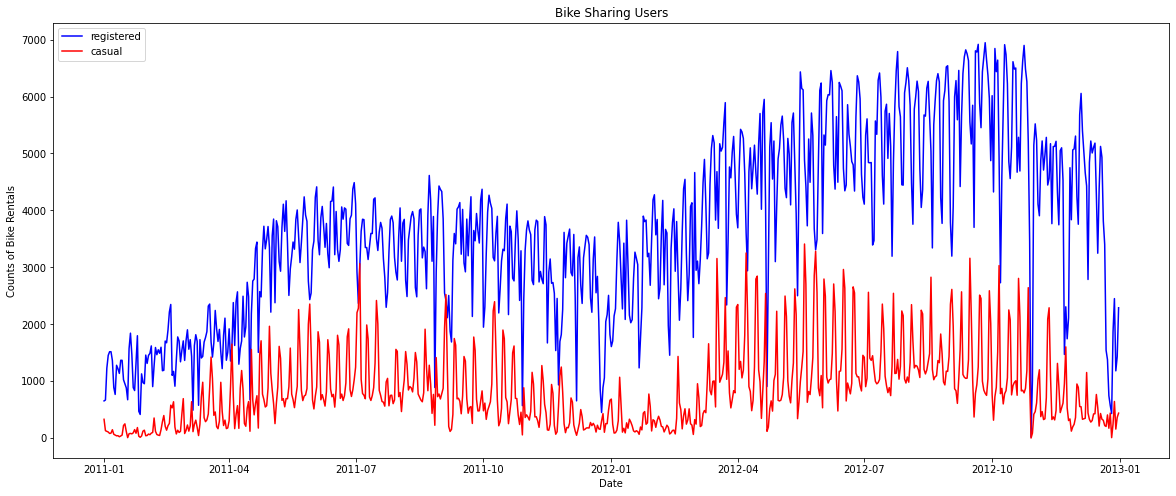

In [10]:
plt.figure(figsize = (20,8))

plt.plot(bikesharing_data['dteday'], bikesharing_data['registered'], color = 'b', label = 'registered')
plt.plot(bikesharing_data['dteday'], bikesharing_data['casual'], color = 'r', label = 'casual')

plt.legend(loc = 'upper left')
plt.title('Bike Sharing Users')
plt.xlabel('Date')
plt.ylabel('Counts of Bike Rentals')

plt.show()

In [16]:
# Counts of Bike share on yearly basis
year_df = bikesharing_data.groupby('yr', as_index = False).mean()
year_df[['yr', 'cnt']]

,yr,cnt
0,0,3405.761644
1,1,5599.934426


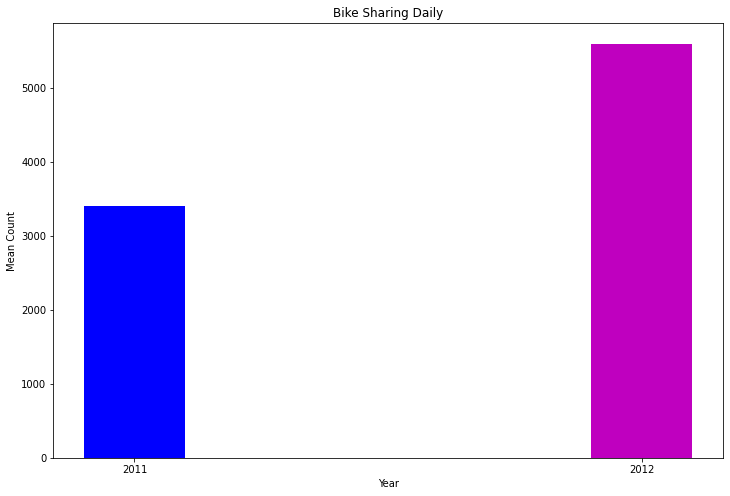

In [19]:
plt.figure(figsize = (12,8))

colors = ['b', 'm']

plt.bar(year_df['yr'], year_df['cnt'], color = colors, width = 0.2)

plt.xticks([0,1], ['2011', '2012'])

plt.title('Bike Sharing Daily')
plt.xlabel('Year')
plt.ylabel('Mean Count')

plt.show()

# More bikes were rented for 2012
# Bussiness seems to have improved

In [21]:
# Average number of Bikes rented on Working Days and Non Working days.
days = bikesharing_data.groupby('workingday', as_index = False).mean()
days[['cnt']]

,cnt
0,4330.168831
1,4584.820000


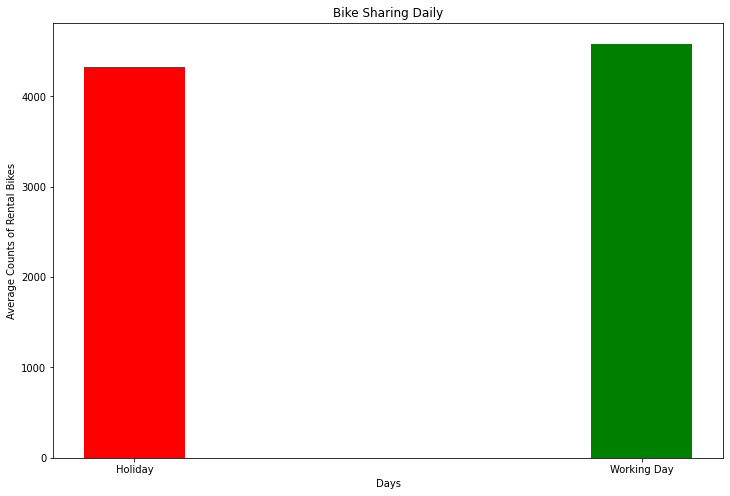

In [23]:
plt.figure(figsize = (12,8))

colors = ['r', 'g']

plt.bar(days['workingday'], days['cnt'], color = colors, width = 0.2)

plt.xticks([0,1], ['Holiday', 'Working Day'])

plt.title('Bike Sharing Daily')
plt.xlabel('Days')
plt.ylabel('Average Counts of Rental Bikes')

plt.show()
# Slightly more bikes are rented on Working Days

In [24]:
# Filtering out data for Year 1 (i.e year 2012)
year_data = bikesharing_data.loc[bikesharing_data['yr'] == 1]
year_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [25]:
# For the year 2012, lets see if there is any monthly variation.
month_df = year_data[['mnth', 'cnt']].groupby('mnth', as_index = False).mean()
month_df

,mnth,cnt
0,1,3120.774194
1,2,3556.448276
2,3,5318.548387
3,4,5807.466667
4,5,6318.225806
5,6,6761.000000
6,7,6567.967742
7,8,6919.451613
8,9,7285.766667
9,10,6414.225806


In [26]:
# Replacing numeric values for month with actual values
# To increase readability of our visualization
month_df['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                         inplace = True)
month_df

,mnth,cnt
0,Jan,3120.774194
1,Feb,3556.448276
2,March,5318.548387
3,April,5807.466667
4,May,6318.225806
5,June,6761.000000
6,July,6567.967742
7,Aug,6919.451613
8,Sept,7285.766667
9,Oct,6414.225806


Text(0, 0.5, 'Average Counts of Bike Rentals')

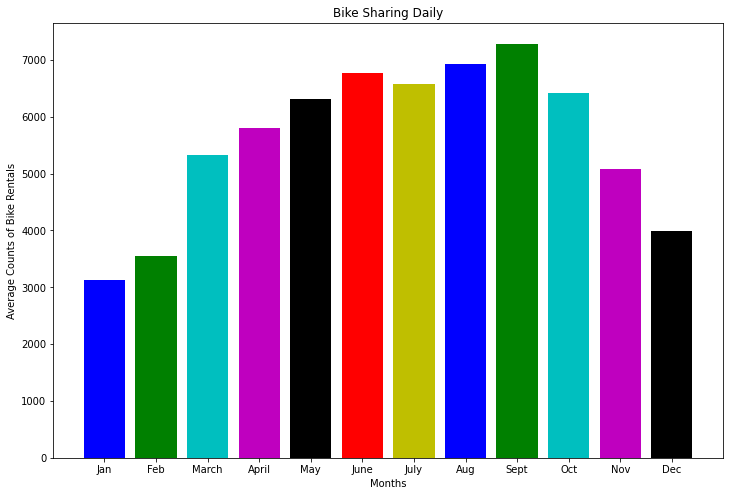

In [27]:
colors = ['b', 'g', 'c', 'm', 'k', 'r', 'y']
plt.figure(figsize = (12,8))
plt.bar(month_df['mnth'], month_df['cnt'], color = colors)

plt.title("Bike Sharing Daily")
plt.xlabel("Months")
plt.ylabel("Average Counts of Bike Rentals")

# September has higgest numbers of Bikes rented
# summer has very good number for bike rentals.